<a href="https://colab.research.google.com/github/GipsyOmega/English_to_German_Translator/blob/main/English_to_German_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
input_text = []
target_text = []
input_characters = set()
target_characters = set()

In [ ]:
vocab_size=10000
embedding_dim=16
max_length = 120
lstm_size = 32
batch_size = 32
epochs = 150
path = '/content/deu.txt'

In [ ]:
with open(path, mode = 'r', encoding = 'utf-8') as f:
  lines = f.read().split('\n')
  for line in lines[:min(vocab_size, len(lines)-1)]:
    input, target, _ = line.split('\t')
    target = '\t' + target + '\n' #using <SOS> as \t and <EOS> as \n
    input_text.append(input)
    target_text.append(target)
    for char in input:
      if char not in input_characters:
        input_characters.add(char)
    for char in target:
      if char not in target_characters:
        target_characters.add(char)

In [ ]:
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
encoder_tokens = len(input_characters)
decoder_tokens = len(target_characters)
max_length_encoder = max(len(x) for x in input_text)
max_length_decoder = max(len(x) for x in target_text)

In [ ]:
print('Input tokens: ', encoder_tokens)
print('Target tokens: ', decoder_tokens)
print('Max English sentence length: ', max_length_encoder)
print('Max German sentence length: ', max_length_decoder)

Input tokens:  70
Target tokens:  83
Max English sentence length:  15
Max German sentence length:  51


In [ ]:
input_token_index = dict((char,i) for i,char in enumerate(input_characters))
target_token_index = dict((char,i) for i,char in enumerate(target_characters))

In [ ]:
input_token_index.items()

dict_items([(' ', 0), ('!', 1), ('"', 2), ('$', 3), ('%', 4), ("'", 5), (',', 6), ('-', 7), ('.', 8), ('0', 9), ('1', 10), ('2', 11), ('3', 12), ('4', 13), ('5', 14), ('7', 15), ('8', 16), ('9', 17), (':', 18), ('?', 19), ('A', 20), ('B', 21), ('C', 22), ('D', 23), ('E', 24), ('F', 25), ('G', 26), ('H', 27), ('I', 28), ('J', 29), ('K', 30), ('L', 31), ('M', 32), ('N', 33), ('O', 34), ('P', 35), ('Q', 36), ('R', 37), ('S', 38), ('T', 39), ('U', 40), ('V', 41), ('W', 42), ('Y', 43), ('a', 44), ('b', 45), ('c', 46), ('d', 47), ('e', 48), ('f', 49), ('g', 50), ('h', 51), ('i', 52), ('j', 53), ('k', 54), ('l', 55), ('m', 56), ('n', 57), ('o', 58), ('p', 59), ('q', 60), ('r', 61), ('s', 62), ('t', 63), ('u', 64), ('v', 65), ('w', 66), ('x', 67), ('y', 68), ('z', 69)])

In [ ]:
# Creating numpy arrays
encoder_input = np.zeros((len(input_text), max_length_encoder, encoder_tokens), dtype = 'float32')
decoder_input = np.zeros((len(input_text), max_length_decoder, decoder_tokens), dtype = 'float32')
decoder_target = np.zeros((len(input_text), max_length_decoder, decoder_tokens), dtype = 'float32')

In [ ]:
for i, (input, target) in enumerate(zip(input_text,target_text)):
  for t, char in enumerate(input):
    encoder_input[i,t,input_token_index[char]] = 1.
  encoder_input[i,t+1:,input_token_index[' ']] = 1.
  for t, char in enumerate(target):
      decoder_input[i,t,target_token_index[char]] = 1.
      if t>0:
        decoder_target[i,t-1,target_token_index[char]] = 1. 
  decoder_input[i,t+1:,target_token_index[' ']] =1. 
  decoder_target[i,t:,target_token_index[' ']] =1. 

In [ ]:
encoder_input.shape

(10000, 15, 70)

In [ ]:
encoder_tokens

70

In [ ]:
from tensorflow.keras.layers import LSTM, Input

In [ ]:
# Model creation
encoder_model = Input(shape=(None, encoder_tokens))
encoder = LSTM(32, return_state=True)
encoder_output, h_state, cell_state = encoder(encoder_model)
encoder_states = [h_state, cell_state]

In [ ]:
decoder_model = Input(shape = (None, decoder_tokens))
decoder = LSTM(32, return_sequences=True, return_state= True)
decoder_output, _, _ = decoder(decoder_model, initial_state = encoder_states)
decoder_layer = tf.keras.layers.Dense(decoder_tokens, activation = 'softmax')
output = decoder_layer(decoder_output)

In [ ]:
model = None
model = tf.keras.models.Model(inputs = [encoder_model, decoder_model], outputs = output)
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics = 'accuracy')
history = model.fit([encoder_input, decoder_input], decoder_target, batch_size = batch_size, epochs = epochs, validation_split = 0.2)

Epoch 1/150
250/250 [==============================] - 5s 12ms/step - loss: 0.3757 - accuracy: 0.8914 - val_loss: 0.5740 - val_accuracy: 0.8396
Epoch 2/150
250/250 [==============================] - 2s 8ms/step - loss: 0.3747 - accuracy: 0.8917 - val_loss: 0.5752 - val_accuracy: 0.8405
Epoch 3/150
250/250 [==============================] - 2s 9ms/step - loss: 0.3742 - accuracy: 0.8918 - val_loss: 0.5755 - val_accuracy: 0.8388
Epoch 4/150
250/250 [==============================] - 2s 8ms/step - loss: 0.3737 - accuracy: 0.8919 - val_loss: 0.5753 - val_accuracy: 0.8395
Epoch 5/150
250/250 [==============================] - 2s 8ms/step - loss: 0.3731 - accuracy: 0.8921 - val_loss: 0.5762 - val_accuracy: 0.8389
Epoch 6/150
250/250 [==============================] - 2s 8ms/step - loss: 0.3727 - accuracy: 0.8923 - val_loss: 0.5751 - val_accuracy: 0.8395
Epoch 7/150
250/250 [==============================] - 2s 8ms/step - loss: 0.3721 - accuracy: 0.8923 - val_loss: 0.5776 - val_accuracy: 0.838

In [ ]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']
loss = history.history['loss']
epoch = history.epoch
plt.plot(epoch, val_accuracy)

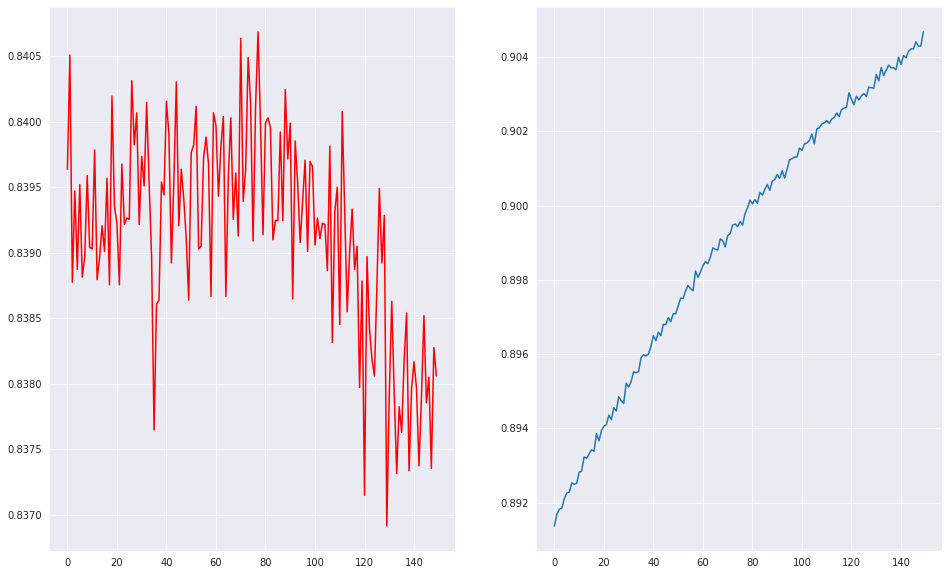

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (16,10))
ax1 = plt.subplot(1,2,1)
ax1.plot(epoch, val_accuracy, 'r-')
ax2 = plt.subplot(1,2,2)
ax2.plot(epoch, accuracy)

In [ ]:
encoder_test_model = tf.keras.models.Model(encoder_model, encoder_states)

decoder_state_input_h = Input(shape=(lstm_size,))
decoder_state_input_c = Input(shape=(lstm_size,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder(decoder_model, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_layer(decoder_outputs)
decoder_test_model = tf.keras.models.Model(
    [decoder_model] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [ ]:
#temp = list(target_token_index)
#target_token_index
reverse_target_char_index = dict([(i,char) for (char,i) in target_token_index.items()])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_test_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_test_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_length_decoder):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
for i in range(10):
  input_seq = encoder_input[i+100:i+101]
  result = decode_sequence(input_seq)
  print("Input sentence: ", input_text[i])
  print("Decoded sentence: ", result)

Input sentence:  Go.
Decoded sentence:  Hast dich?

Input sentence:  Hi.
Decoded sentence:  Danke!

Input sentence:  Hi.
Decoded sentence:  Danken Sie.

Input sentence:  Run!
Decoded sentence:  Versuchen Sie mich mich!

Input sentence:  Run.
Decoded sentence:  Wir sind schnell.

Input sentence:  Wow!
Decoded sentence:  Wir haben es gesehen.

Input sentence:  Wow!
Decoded sentence:  Worde Tom geschlagen?

Input sentence:  Duck!
Decoded sentence:  Braus Tom.

Input sentence:  Fire!
Decoded sentence:  Braus Tom.

Input sentence:  Help!
Decoded sentence:  Braus Tom.



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Custom Prediction
print("How many sentences do you wanna use? (Atleast 2)")
n = int(input())
custom_seq = []
for i in range(n):
  custom_seq.append(input())
sample_hot_encoding = np.zeros((len(custom_seq),max_length_encoder, encoder_tokens),dtype='float32')
for i in range(n):
  for t, char in enumerate(custom_seq):
    encoder_input[i,t,input_token_index[char]] = 1.
  encoder_input[i,t+1:,input_token_index[' ']] = 1.